In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
insurance = pd.read_csv("C:/Users/user/Desktop/insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
#判断数据集中是否有缺失值
insurance.isnull().sum()
#结果显示数据集中没有缺失值

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
insurance["sex"].describe()
#一共1338个，分两类，数值类型是object。

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [4]:
insurance["smoker"].describe()
#一共1338个，分两类，数值类型是object。

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [5]:
insurance["region"].describe()
#一共1338个，分四类，数值类型是object。

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [6]:
insurance.region.value_counts()
#这里，我们看到数据几乎均匀地分布在4个地理区域中。

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
insurance["charges"].describe()
#一共1338个，数值类型是浮点型。
#因为平均值远大于中位数，所以这表明保险费用的分布是右偏的，我们可以使用直观的直方图来证实这一点。

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

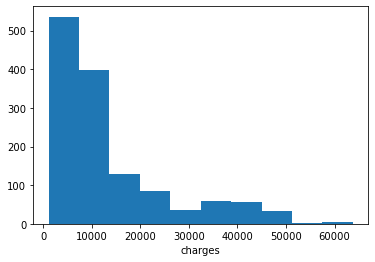

In [8]:
import pylab as pl
pl.hist(insurance["charges"])
pl.xlabel('charges')
pl.show()
#在我们的数据中，绝大多数的个人每年的医疗费用都在0~15000美元，尽管分布的尾部经过直方图的峰部后延伸得很远。
#因为线性回归假设因变量的分布为正态分布，所以这种分布是不理想的。在实际应用中，线性回归的假设往往会被违背。
#如果需要，我们在后面能够修正该假设。

#即将面临的另一个问题就是回归模型需要每一个特征都是数值型的，而在我们的数据中，我们有3个非数值类型的特征。

#变量sex被划分成male和female两个水平，而变量smoker被划分成yes和no两个水平。从describe()的输出中，我们知道变量region有4个水平，
#但我们需要仔细看一看，它们是如何分布的。

In [9]:
#数据集中很多特征的数值类型是object型，因此需要进行One-Hot编码
insurance_children = insurance['children']
insurance_bmi = insurance['bmi']
insurance_age = insurance['age']
insurance_charges = insurance['charges']
insurance_1 = insurance.drop(['charges'], axis = 1)  
insurance_1 = insurance_1.drop(['age'], axis = 1)     
insurance_1 = insurance_1.drop(['bmi'], axis = 1)    
insurance_new = insurance_1.drop(['children'], axis = 1)        
insurance_new=pd.get_dummies(insurance_new, prefix = insurance_new.columns).astype(int)
insurance_new['age'] = insurance_age
insurance_new['bmi'] = insurance_bmi
insurance_new['children'] = insurance_children
insurance_new['charges'] = insurance_charges
insurance_new.head(10)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520
5,1,0,1,0,0,0,1,0,31,25.740,0,3756.62160
6,1,0,1,0,0,0,1,0,46,33.440,1,8240.58960
7,1,0,1,0,0,1,0,0,37,27.740,3,7281.50560
8,0,1,1,0,1,0,0,0,37,29.830,2,6406.41070
9,1,0,1,0,0,1,0,0,60,25.840,0,28923.13692


In [10]:
insurance_new_y = insurance_new['charges']
insurance_new_x = insurance_new.drop(['charges'], axis = 1)

In [11]:
insurance_new_x.head(10)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1,0,0,1,0,0,0,1,19,27.900,0
1,0,1,1,0,0,0,1,0,18,33.770,1
2,0,1,1,0,0,0,1,0,28,33.000,3
3,0,1,1,0,0,1,0,0,33,22.705,0
4,0,1,1,0,0,1,0,0,32,28.880,0
5,1,0,1,0,0,0,1,0,31,25.740,0
6,1,0,1,0,0,0,1,0,46,33.440,1
7,1,0,1,0,0,1,0,0,37,27.740,3
8,0,1,1,0,1,0,0,0,37,29.830,2
9,1,0,1,0,0,1,0,0,60,25.840,0


In [12]:
insurance_new_y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [13]:
#决策树回归
X = insurance_new_x
Y = insurance_new_y
# 模型实例化
from sklearn.tree import DecisionTreeRegressor  
regr=DecisionTreeRegressor(criterion="mse",splitter="random",max_depth=8,random_state=0)
# 训练模型
regr.fit(X, Y)
# 回归预测效果 
print('Residual sum of squares: %.2f'
      % np.mean((regr.predict(X) - Y) ** 2))
print('Variance score: %.2f' % regr.score(X, Y))

Residual sum of squares: 15475433.82
Variance score: 0.89


In [14]:
#检测模型的泛化能力
from sklearn.model_selection import cross_val_score, ShuffleSplit
dt_fit=regr.fit(X,Y)
dt_scores = cross_val_score(regr, X,Y,scoring="r2", cv =ShuffleSplit(n_splits=10, test_size=0.2))
print('Mean cross validation score:%.2f'
      %np.mean(dt_scores))
print('Score without cv:%.2f'% dt_fit.score(X,Y))
#结果显示模型泛化能力很差，模型过拟合，同时拟合效果也不好。

Mean cross validation score:0.80
Score without cv:0.89


In [15]:
#梯度提升决策树回归
X = insurance_new_x
Y = insurance_new_y
# 模型实例化
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100,random_state=2,max_depth=2)#min_samples_split=40,
# 训练模型
gb.fit(X,Y)
# 回归预测效果 
predict=gb.predict(X)
print('Residual sum of squares: %.2f'
      % np.mean((predict-Y) ** 2))
print('Variance score: %.2f' % gb.score(X,Y))

Residual sum of squares: 17570601.02
Variance score: 0.88


In [16]:
#检测模型的泛化能力
dt_fit=gb.fit(X,Y)
dt_scores = cross_val_score(dt_fit, X,Y,scoring="r2", cv =ShuffleSplit(n_splits=10, test_size=0.2))
print('Mean cross validation score:%.2f'
      %np.mean(dt_scores))
print('Score without cv:%.2f'% dt_fit.score(X,Y))
#结果显示模型泛化能力比较好，模型比较适合。

Mean cross validation score:0.86
Score without cv:0.88


In [17]:
#AdaBoost回归
X = insurance_new_x
Y = insurance_new_y
# 模型实例化
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion="mse",splitter="random",max_depth=6,random_state=0),    
                      n_estimators=500,learning_rate=0.001)
# 训练模型
ada.fit(X,Y)
# 回归预测效果 
predict=ada.predict(X)
print('Residual sum of squares: %.2f'
      % np.mean((predict-Y) ** 2))
print('Variance score: %.2f' % ada.score(X,Y))

Residual sum of squares: 17573743.03
Variance score: 0.88


In [18]:
#检测模型的泛化能力
dt_fit=ada.fit(X,Y)
dt_scores = cross_val_score(ada, X,Y,scoring="r2", cv =ShuffleSplit(n_splits=10, test_size=0.2))
print('Mean cross validation score:%.2f'
      %np.mean(dt_scores))
print('Score without cv:%.2f'% dt_fit.score(X,Y))
#结果显示模型泛化能力比较好，模型比较适合。

Mean cross validation score:0.86
Score without cv:0.88


In [19]:
#随机森林
X = insurance_new_x
Y = insurance_new_y
# 模型实例化
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, max_depth=4)#min_samples_split=40,mae
# 训练模型
rf.fit(X,Y)
# 回归预测效果 
predict=rf.predict(X)
print('Residual sum of squares: %.2f'
      % np.mean((predict-Y) ** 2))
print('Variance score: %.2f' % rf.score(X,Y))

Residual sum of squares: 18249151.55
Variance score: 0.88


In [20]:
#检测模型的泛化能力
dt_fit=rf.fit(X,Y)
dt_scores = cross_val_score(rf, X,Y,scoring="r2", cv =ShuffleSplit(n_splits=10, test_size=0.2))
print('Mean cross validation score:%.2f'
      %np.mean(dt_scores))
print('Score without cv:%.2f'% dt_fit.score(X,Y))
#结果显示模型泛化能力比较好，模型比较适合。

Mean cross validation score:0.84
Score without cv:0.88


In [21]:
#考虑特征之间的关系——相关系数矩阵
insurance[["age","bmi","children","charges"]].corr()
#在每个行与列的交叉点，列出的相关系数表示其所在的行与其所在的列的两个变量之间的相关系数。对角线始终为1，
#因为一个变量和其自身之间总是完全相关的。因为相关性是对称的，换句话说就是，corr(x,y) = corr(y,x)，所以对角线上方的值与其下方的值是相同的。

#该矩阵中的相关系数不是强相关的，但还是存在一些显著的关联。例如，age和bmi显示出中度相关，这意味着随着年龄（age）的增长，
#身体质量指数（bmi）也会增加。此外，age和charges，bmi和charges，以及children和charges也都呈现出中度相关。

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [22]:
from sklearn import linear_model
insurance_new_y = insurance_new['charges']
insurance_new_x1 = insurance_new.drop(['sex_female'], axis = 1)
insurance_new_x1 = insurance_new_x1.drop(['smoker_no'], axis = 1)
insurance_new_x1 = insurance_new_x1.drop(['region_northeast'], axis = 1)
insurance_new_x = insurance_new_x1.drop(['charges'], axis = 1)
#保留sex_female、smoker_no和region_northeast变量，使东北地区的女性非吸烟者作为参照组。

In [23]:
insurance_new_x.head(10)

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,1,19,27.900,0
1,1,0,0,1,0,18,33.770,1
2,1,0,0,1,0,28,33.000,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.880,0
5,0,0,0,1,0,31,25.740,0
6,0,0,0,1,0,46,33.440,1
7,0,0,1,0,0,37,27.740,3
8,1,0,0,0,0,37,29.830,2
9,0,0,1,0,0,60,25.840,0


In [24]:
insurance_new_y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [25]:
regr = linear_model.LinearRegression()
regr.fit(insurance_new_x, insurance_new_y)
print('Intercept: %.2f'
      % regr.intercept_)
print('Coefficients: ')
print(regr.coef_)
print('Residual sum of squares: %.2f'
      % np.mean((regr.predict(insurance_new_x) - insurance_new_y) ** 2))
print('Variance score: %.2f' % regr.score(insurance_new_x, insurance_new_y))
#在其他特征保持不变时，一个特征的 β 系数表示该特征每增加一个单位，charges（费用）的增加量。例如，随着每一年年龄的增加，
#假设其他一切都一样（不变），我们将会预计平均增加256.90美元的医疗费用。同样，每增加一个孩子，每年将会产生平均475.50美元的额外医疗费用；
#而每增加一个单位的BMI，每年的医疗费用将会增加339.20美元。

#相对于女性来说，男性每年的医疗费用要少131.30美元；吸烟者平均多花费23848.50美元，远超过非吸烟者。此外，模型中另外3个地区的系数是负的，
#这意味着东北地区倾向于具有最高的平均医疗费用。

#线性回归模型中的结果是合乎逻辑的。高龄、吸烟和肥胖往往与其他健康问题联系在一起，而额外的家庭成员或者受抚养者可能会导致就诊次数增加
#和预防保健（比如接种疫苗、每年体检）费用的增加。

Intercept: -11938.54
Coefficients: 
[ -131.3143594  23848.53454191  -352.96389942 -1035.02204939
  -960.0509913    256.85635254   339.19345361   475.50054515]
Residual sum of squares: 36501893.01
Variance score: 0.75


In [26]:
#1.添加非线性关系
#在线性回归中，自变量和因变量之间的关系呗假定为是线性的，然而这不一定是正确的。例如，对所有的年龄值来讲，
#年龄对于医疗费用的影响可能不是恒定的；对于最老的人群，治疗可能会过于昂贵。

#一个典型的回归方程遵循如下的类似形式： y=α+β1x 
#考虑到非线性关系，可以添加一个高阶项到回归模型中，把模型当做多项式处理。实际上，我们将建立一个如下所示的关系模型： y=α+β1x+β2x2 
#这两个模型之间的区别在于将估计一个单独的 β2 ，其目的是捕捉 x2 项的效果，这允许通过一个年龄的平方项来度量年龄的影响。

#为了将非线性年龄添加到模型中，我们只需要创建一个新的变量：
insurance_new['age2'] = insurance_new['age']*insurance_new['age']
insurance_new['age2'].head(10)

0     361
1     324
2     784
3    1089
4    1024
5     961
6    2116
7    1369
8    1369
9    3600
Name: age2, dtype: int64

In [27]:
#2.将一个数值型变量转换为一个二进制指标
#假设我们有一种预感，一个特征的影响不是累积的，而是当特征的取值达到一个给定的阈值后才产生影响。例如，对于在正常体重范围内的个人来说，
#BMI对医疗费用的影响可能为0，但是对于肥胖者（即BMI不低于30）来说，它可能与较高的费用密切相关。

#我们可以通过创建一个二进制指标变量来建立这种关系，即如果BMI大于等于30，那么设定为1，否则设定为0。
#该二元特征的 β 估计表示BMI大于等于30的个人相对于BMI小于30的个人对医疗费用的平均净影响。
insurance_new['bmi30'] = 0
for i in range(0, 1338):
    if insurance_new['bmi'][i] >= 30 :
        insurance_new['bmi30'][i] = 1
    else:
        insurance_new['bmi30'][i] = 0
insurance_new['bmi30'].head(10)
#然后，可以在改进的模型中包含bmi30的变量，无论是取代原来的bmi变量，还是作为补充，这取决于我们是否认为除了一个单独的BMI影响外，
#肥胖的影响也会发生。如果没有很好的理由不这样做，那么我们将在最后的模型中包含两者。

<ipython-input-27-1c2e8c28bc46>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_new['bmi30'][i] = 0
<ipython-input-27-1c2e8c28bc46>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_new['bmi30'][i] = 1


0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: bmi30, dtype: int64

In [28]:
#3.加入相互作用的影响
#到目前为止，我们只考虑了每个特征对结果的单独影响（贡献）。如果某些特征对因变量有综合影响，那么该怎么办呢？例如，吸烟和肥胖可能分别都有有害的
#影响，但是假设它们的共同影响可能会比它们每一个单独影响更糟糕是合理的。

#当两个特征存在共同的影响时，这称为相互作用（interaction）。如果怀疑两个变量相互作用，那么可以通过在模型中添加它们的相互作用来检验这一假设，
#可以使用R中的公式语法来指定相互作用的影响。为了体现肥胖指标（bmi30）和吸烟指标（smoker）的相互作用，可以将bmi30 ∗ smoker_yes也作为自变量放
#入模型。
#4.改进的回归模型
#基于医疗费用如何与患者特点联系在一起的一点学科知识，我们开发了一个我们认为更加精确专用的回归公式。下面就总结一下我们的改进：
#增加了一个非线性年龄项,为肥胖创建了一个指标,制定了肥胖和吸烟之间的相互作用
#我们将像之前一样使用回归函数来训练模型，但是这一次，我们将添加新构造的变量和相互作用项：
insurance_new['bmi30_smoker']=insurance_new['bmi30']*insurance_new['smoker_yes']
insurance_new.head(15)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges,age2,bmi30,bmi30_smoker
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400,361,0,0
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230,324,1,0
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200,784,1,0
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061,1089,0,0
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520,1024,0,0
5,1,0,1,0,0,0,1,0,31,25.740,0,3756.62160,961,0,0
6,1,0,1,0,0,0,1,0,46,33.440,1,8240.58960,2116,1,0
7,1,0,1,0,0,1,0,0,37,27.740,3,7281.50560,1369,0,0
8,0,1,1,0,1,0,0,0,37,29.830,2,6406.41070,1369,0,0
9,1,0,1,0,0,1,0,0,60,25.840,0,28923.13692,3600,0,0


In [29]:
insurance_new_y = insurance_new['charges']
insurance_new_x1 = insurance_new.drop(['sex_female'], axis = 1)
insurance_new_x1 = insurance_new_x1.drop(['smoker_no'], axis = 1)
insurance_new_x1 = insurance_new_x1.drop(['region_northeast'], axis = 1)
insurance_new_x = insurance_new_x1.drop(['charges'], axis = 1)
regr = linear_model.LinearRegression()
regr.fit(insurance_new_x, insurance_new_y)

print('Intercept: %.2f'
      % regr.intercept_)
print('Coefficients: ')
print(regr.coef_)
print('Residual sum of squares: %.2f'
      % np.mean((regr.predict(insurance_new_x) - insurance_new_y) ** 2))
print('Variance score: %.2f' % regr.score(insurance_new_x, insurance_new_y))
#分析该模型的拟合统计量有助于确定我们的改变是否提高了回归模型的性能。相对于我们的第一个模型，R方值从0.75提高到约0.87，
#我们的模型现在能解释医疗费用变化的87%。肥胖和吸烟之间的相互作用表明了一个巨大的影响，除了单独吸烟增加的超过13404美元的费用外，
#肥胖的吸烟者每年要另外花费19810美元，这可能表明吸烟会加剧（恶化）与肥胖有关的疾病。

Intercept: 134.25
Coefficients: 
[-4.96824457e+02  1.34046866e+04 -2.79203806e+02 -8.28546726e+02
 -1.22264365e+03 -3.26851487e+01  1.20019552e+02  6.78561198e+02
  3.73157552e+00 -1.00014032e+03  1.98107533e+04]
Residual sum of squares: 19578928.42
Variance score: 0.87


In [30]:
dt_fit=regr.fit(insurance_new_x,insurance_new_y)
dt_scores = cross_val_score(regr, insurance_new_x,insurance_new_y, cv =ShuffleSplit(n_splits=10, test_size=0.2))   
print('Mean cross validation score:%.2f'
      %np.mean(dt_scores))
print('Score without cv:%.2f'% dt_fit.score(insurance_new_x,insurance_new_y))

Mean cross validation score:0.87
Score without cv:0.87
